**CAR PRICE PREDICTION WITH MACHINE LEARNING**

**PROBLEM STATEMENT**

In the automotive industry, determining the price of a car involves various factors, such as brand reputation, car features, horsepower, and fuel efficiency. Car price prediction is a crucial application of machine learning. This project is designed to help you learn how to build a model for car price prediction.

**PROBLEM OBJECTIVE**

The objective of car price prediction with machine learning is to develop a model that can accurately estimate the selling price of a car based on various features such as its make, model, year, mileage, condition, location, and additional characteristics. The primary goal is to create a predictive tool that can assist buyers, sellers, and dealerships in determining fair and competitive prices for used cars.

**Importing the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

**Loading the Dataset**

In [ ]:
df = pd.read_csv("/content/car data.csv")
print(df)

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual    

The Car Price Prediction dataset consists of Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner.

There are 301 rows and 9 columns provided in the data.

**Data Preprocessing**

In [ ]:
#Checking for null values
print(df.isna().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [ ]:
#Checking for duplicate values
print(df.duplicated().sum())

2


In [ ]:
df.drop_duplicates()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


There are 299 rows and 9 columns in the dataset after droping the duplicates.

In [ ]:
print(df.describe())

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


By preprocessing the dataset we have come know that,

no null values exist

no duplicate values exist

**EXPLORING THE DATASET**

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Car_Name is 98
No. of unique values in Year is 16
No. of unique values in Selling_Price is 156
No. of unique values in Present_Price is 148
No. of unique values in Driven_kms is 206
No. of unique values in Fuel_Type is 3
No. of unique values in Selling_type is 2
No. of unique values in Transmission is 2
No. of unique values in Owner is 3


In [ ]:
df["Car_Name"].value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

Text(0, 0.5, 'Car_Name')

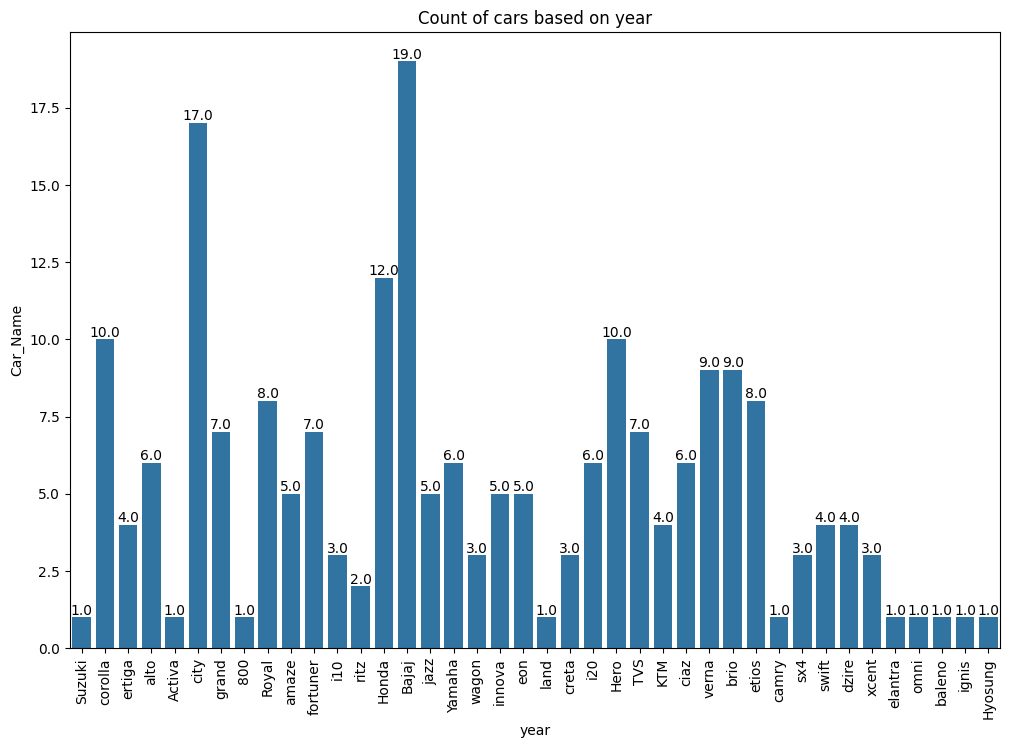

In [ ]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Year', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(),
                        (p.get_x() + p.get_width() / 2.0,
                         p.get_height()),
                        ha = 'center',
                        va = 'center',
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on year")
plt.xlabel("year")
plt.ylabel("Car_Name")

<ipython-input-129-8e63476c03c5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Car_Name",data=df,palette="Set1")


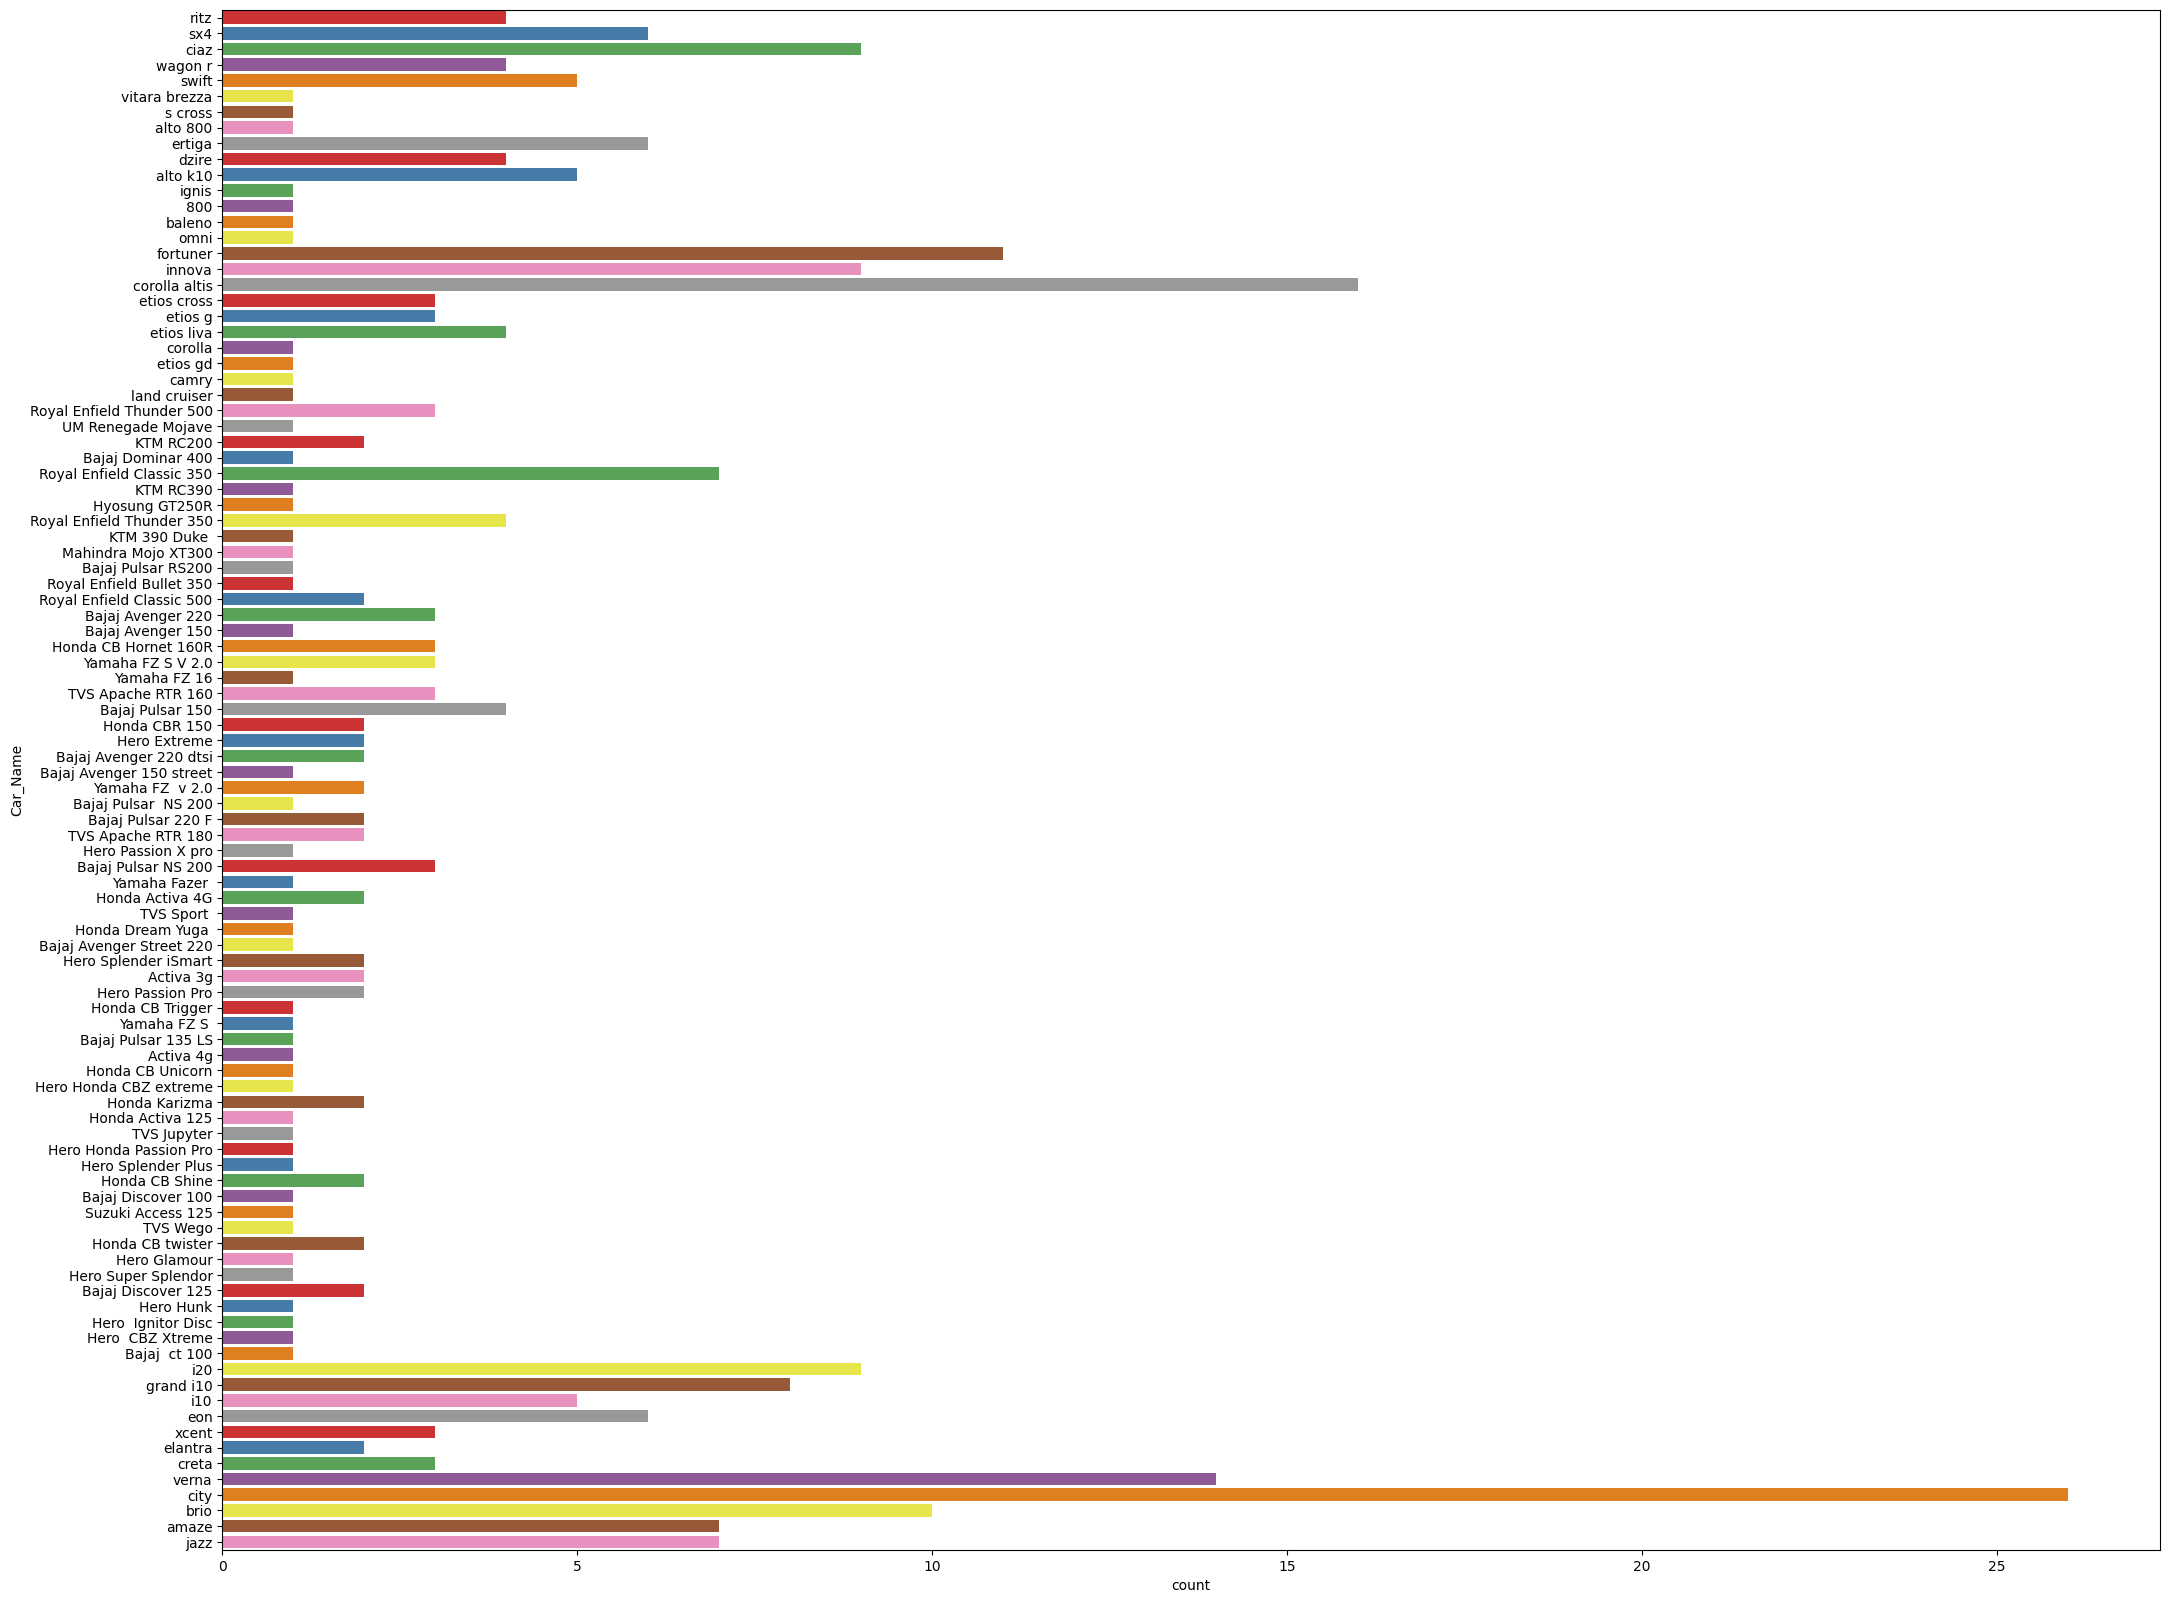

In [ ]:
plt.figure(figsize=(25,20))
sns.countplot(y="Car_Name",data=df,palette="Set1")
plt.show()

<ipython-input-130-6d8fbaa4ce6e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Year",data=df,palette="Set1")


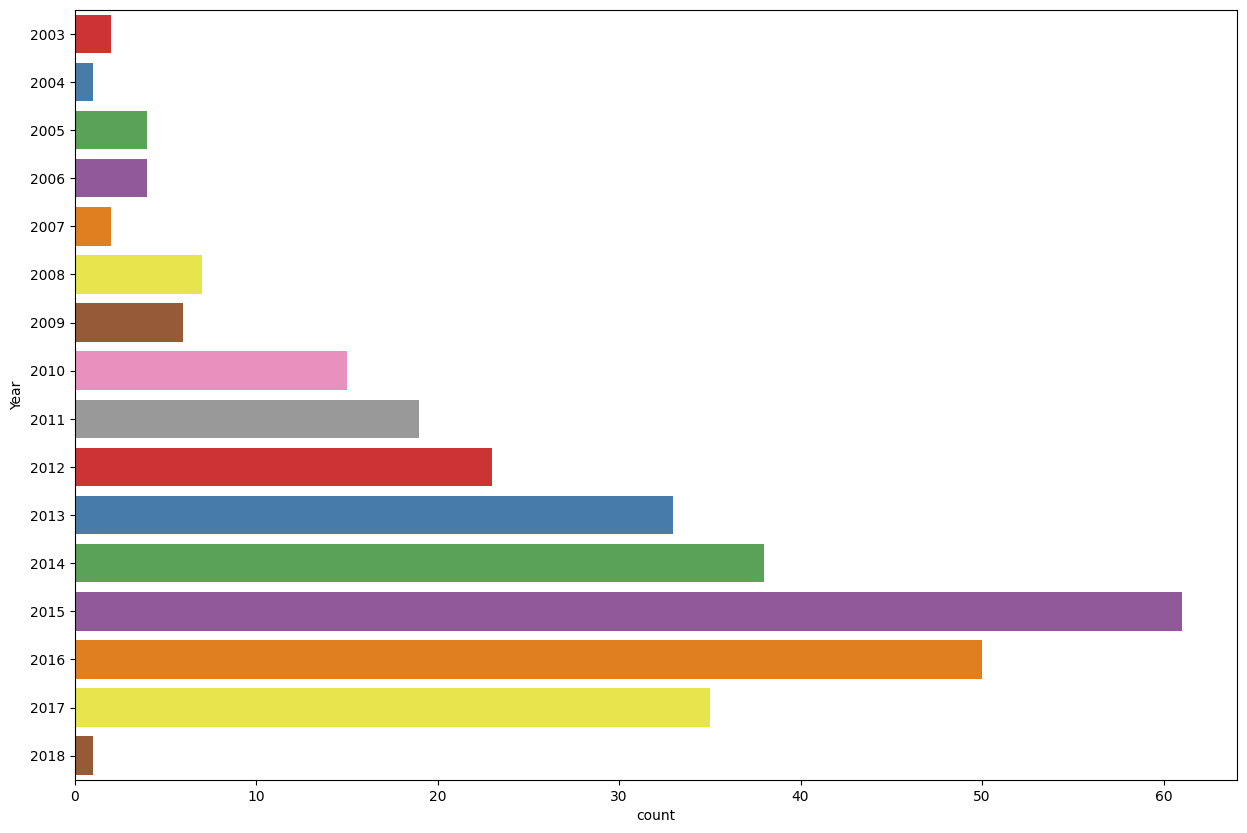

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(y="Year",data=df,palette="Set1")
plt.show()

<ipython-input-131-b9a21888f9d3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Fuel_Type",data=df,palette="Set1")


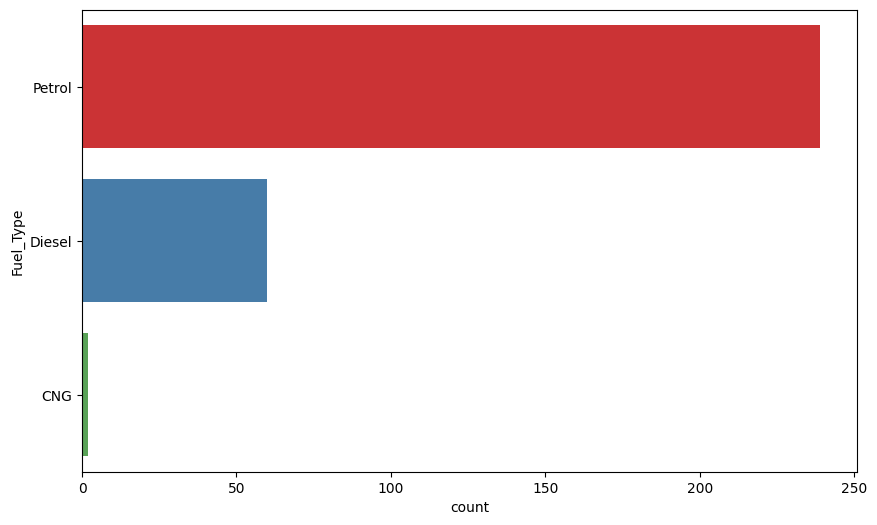

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y="Fuel_Type",data=df,palette="Set1")
plt.show()

<ipython-input-132-e0214013ccb6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Selling_type",data=df,palette="hsv")


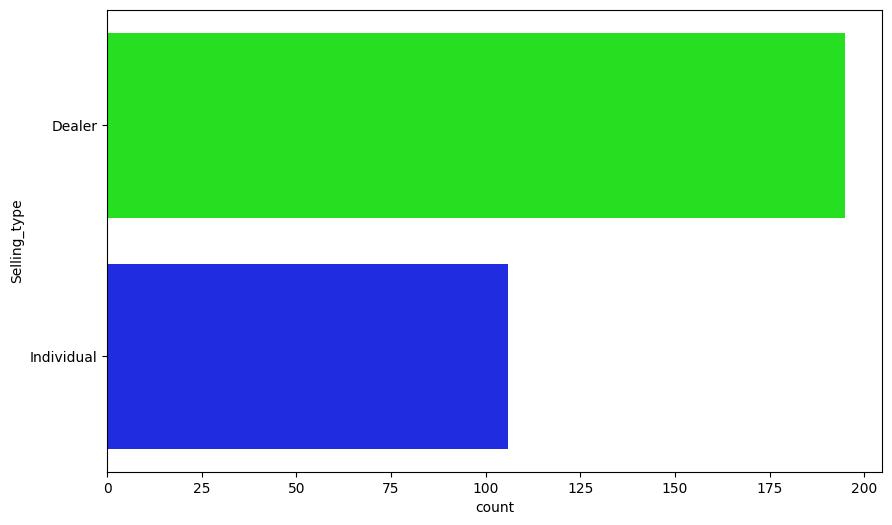

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y="Selling_type",data=df,palette="hsv")
plt.show()

<ipython-input-133-21d74cfc4cb4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Transmission",data=df,palette="brg")


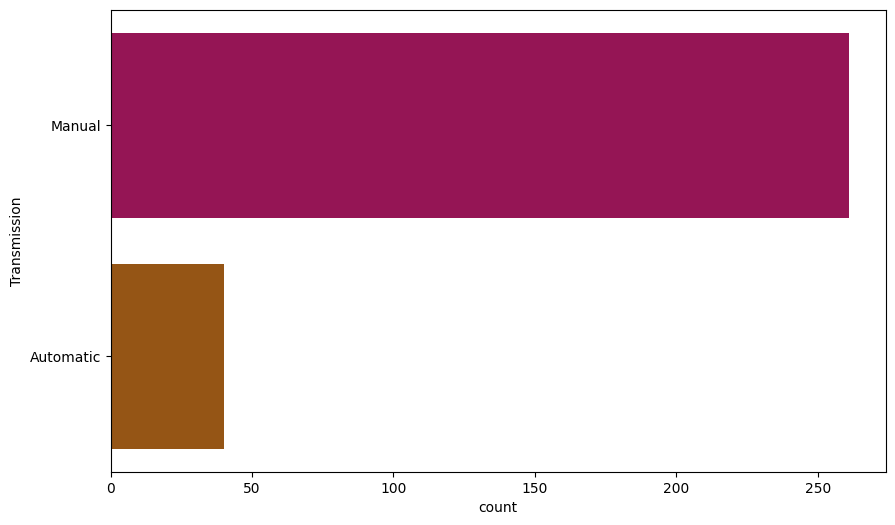

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y="Transmission",data=df,palette="brg")
plt.show()

<ipython-input-134-e8d7f9f113b2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Owner",data=df,palette="brg")


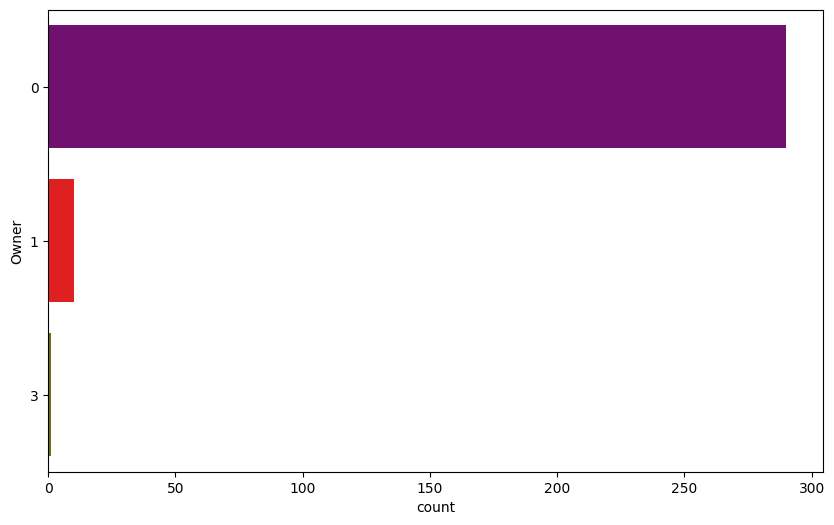

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y="Owner",data=df,palette="brg")
plt.show()

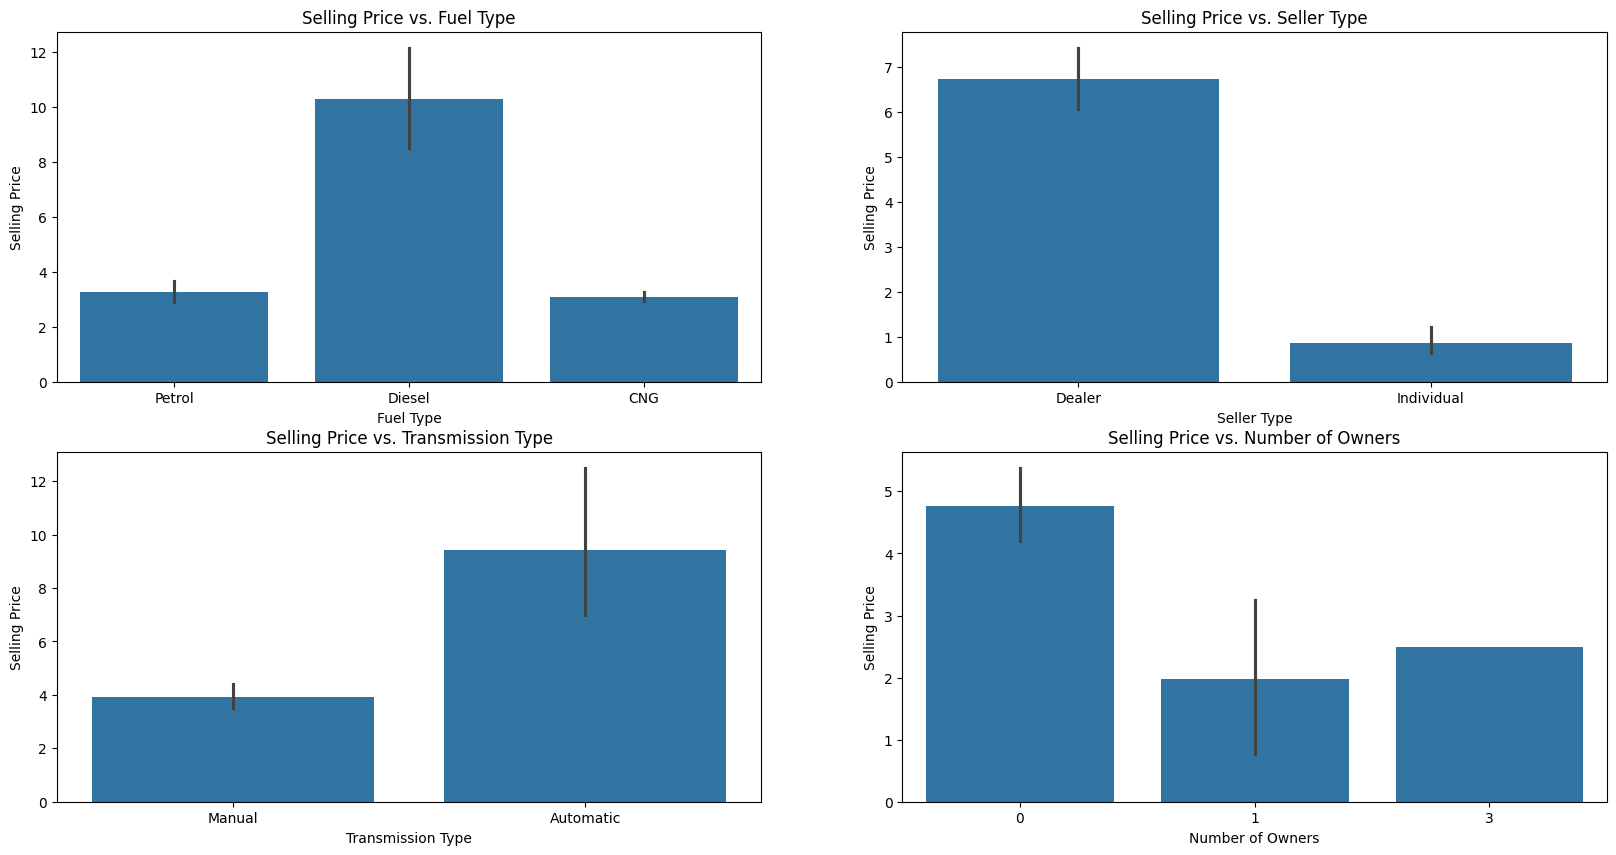

In [ ]:
plt.figure(figsize=(20,10))

# Subplot 1: Barplot for Selling_Price vs. Fuel_Type
plt.subplot(2,2,1)
sns.barplot(data=df, x='Fuel_Type', y='Selling_Price')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Fuel Type')

# Subplot 2: Barplot for Selling_Price vs. Seller_Type
plt.subplot(2,2,2)
sns.barplot(data=df, x='Selling_type', y='Selling_Price')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Seller Type')

# Subplot 3: Barplot for Selling_Price vs. Transmission
plt.subplot(2,2,3)
sns.barplot(data=df, x='Transmission', y='Selling_Price')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Transmission Type')

# Subplot 4: Barplot for Selling_Price vs. Owner
plt.subplot(2,2,4)
sns.barplot(data=df, x='Owner', y='Selling_Price')
plt.xlabel('Number of Owners')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Number of Owners')

# Display the plot
plt.show()

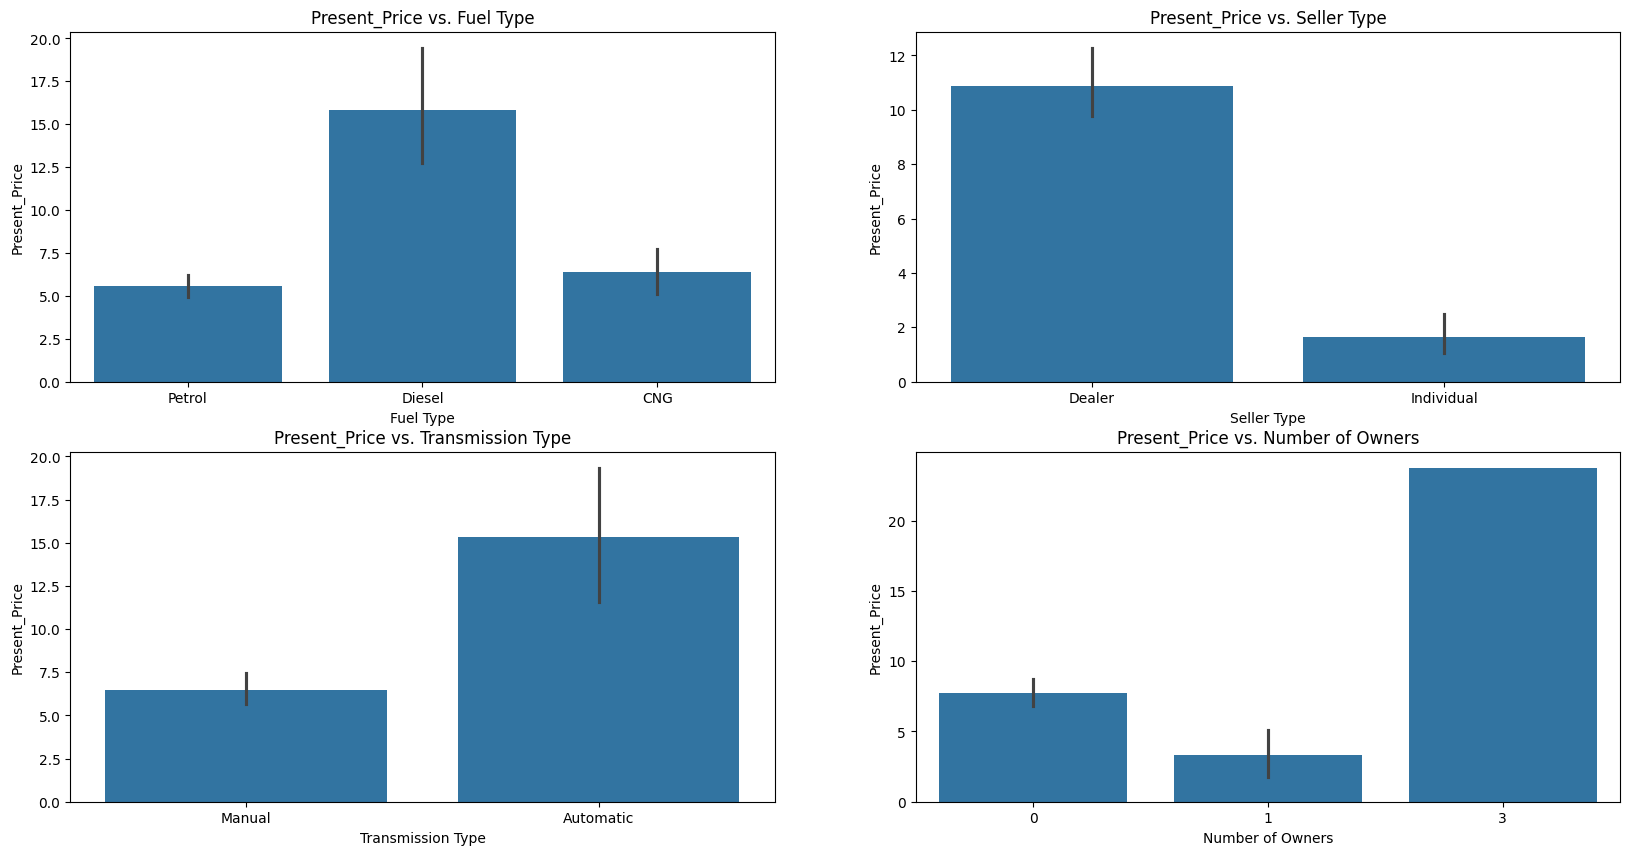

In [ ]:
plt.figure(figsize=(20,10))

# Subplot 1: Barplot for Selling_Price vs. Fuel_Type
plt.subplot(2,2,1)
sns.barplot(data=df, x='Fuel_Type', y='Present_Price')
plt.xlabel('Fuel Type')
plt.ylabel('Present_Price')
plt.title('Present_Price vs. Fuel Type')

# Subplot 2: Barplot for Selling_Price vs. Seller_Type
plt.subplot(2,2,2)
sns.barplot(data=df, x='Selling_type', y='Present_Price')
plt.xlabel('Seller Type')
plt.ylabel('Present_Price')
plt.title('Present_Price vs. Seller Type')

# Subplot 3: Barplot for Selling_Price vs. Transmission
plt.subplot(2,2,3)
sns.barplot(data=df, x='Transmission', y='Present_Price')
plt.xlabel('Transmission Type')
plt.ylabel('Present_Price')
plt.title('Present_Price vs. Transmission Type')

# Subplot 4: Barplot for Selling_Price vs. Owner
plt.subplot(2,2,4)
sns.barplot(data=df, x='Owner', y='Present_Price')
plt.xlabel('Number of Owners')
plt.ylabel('Present_Price')
plt.title('Present_Price vs. Number of Owners')

# Display the plot
plt.show()

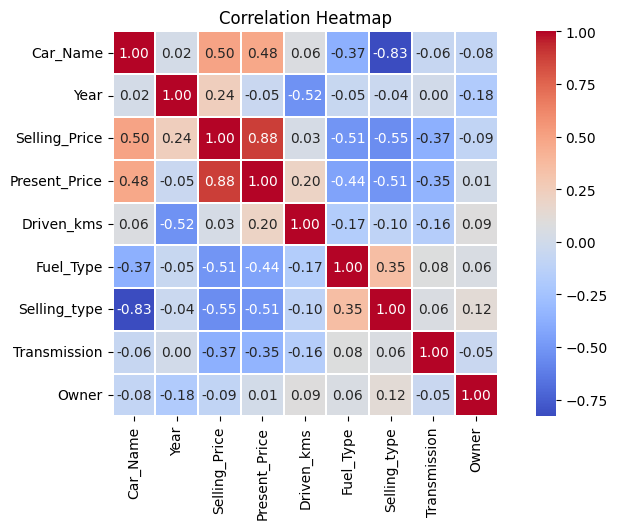

In [ ]:
# Correlation Heatmap visualization code
# Set the size of the plot
plt.figure(figsize=(10, 5))

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(df.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True, cmap='coolwarm')

# Add a title to the plot
plt.title("Correlation Heatmap")

# Display the plot
plt.show()

In [ ]:
col=["Car_Name","Fuel_Type","Selling_type","Transmission"]
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for x in col:
    df[x]=label_encoder.fit_transform(df[x])

In [ ]:
scale=["Car_Name","Year","Selling_Price","Present_Price","Driven_kms"]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[scale]=scaler.fit_transform(df[scale])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
X=df.drop(columns="Selling_Price",axis=1)
Y=df["Selling_Price"]
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_regressor.fit(x_train,y_train)
pred1=gb_regressor.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
mae = mean_absolute_error(y_test,pred1)
print("Mean Absolute Error (MAE):", mae)
mse = mean_squared_error(y_test,pred1)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test,pred1)
print("R-squared (R2) Score:", r2)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test,pred1)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 0.09817644299350024
Mean Squared Error (MSE): 0.02584666420589415
R-squared (R2) Score: 0.9711086363805742
Mean Absolute Percentage Error (MAPE): 57.31518980373161


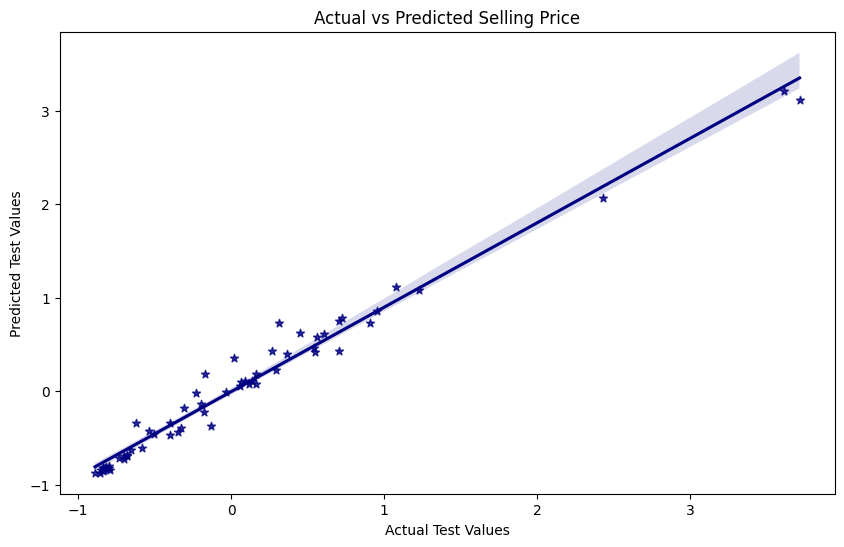

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=pred1, color="navy",marker="*",label="best_fit_line")
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Test Values')
plt.show()

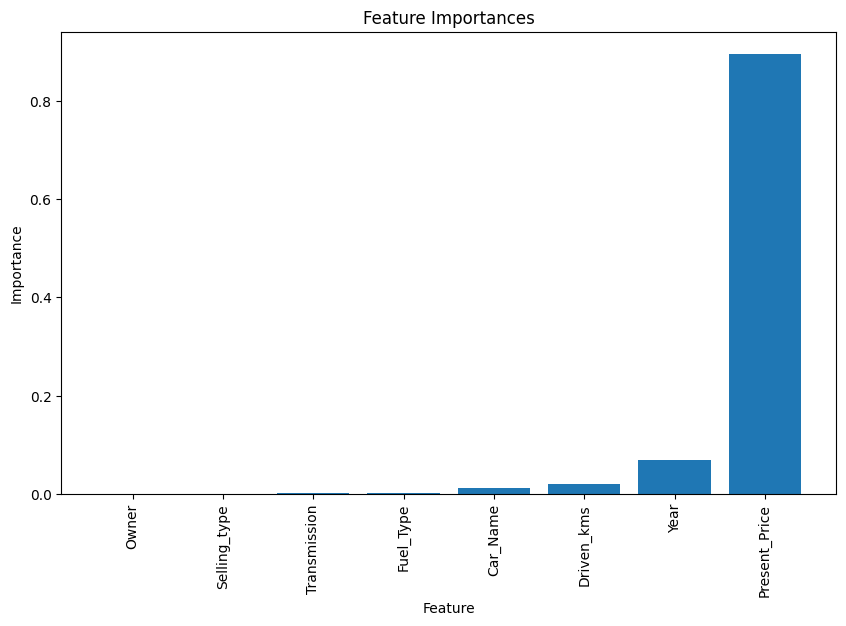

In [ ]:
importances = gb_regressor.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importances[sorted_indices], align='center')
plt.xticks(range(len(feature_names)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


**RandomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train,y_train)
pred2=rf_regressor.predict(x_test)

In [ ]:
mae = mean_absolute_error(y_test,pred2)
print("Mean Absolute Error (MAE):", mae)
mse = mean_squared_error(y_test,pred2)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test,pred2)
print("R-squared (R2) Score:", r2)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test,pred2)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 0.11565890652513212
Mean Squared Error (MSE): 0.030600711948461833
R-squared (R2) Score: 0.9657945687353068
Mean Absolute Percentage Error (MAPE): 68.29155461976217


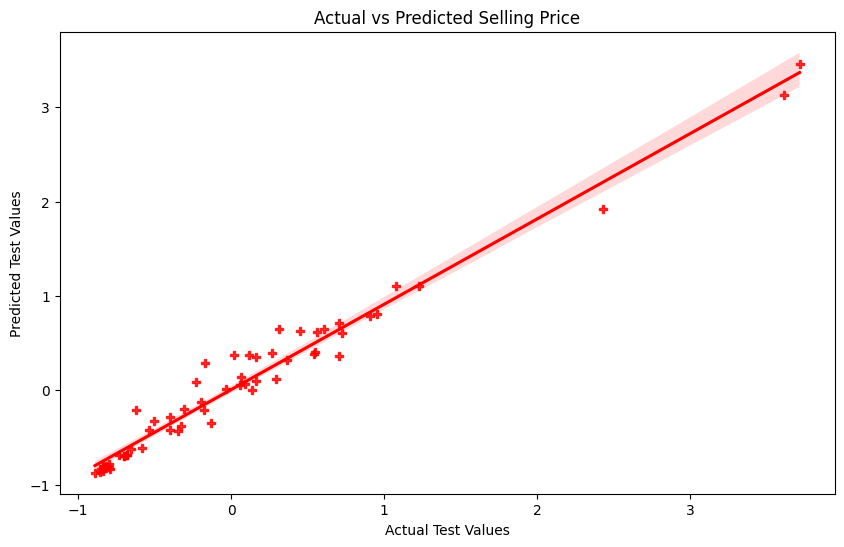

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=pred2, color="red",marker="P",label="best_fit_line")
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Test Values')
plt.show()

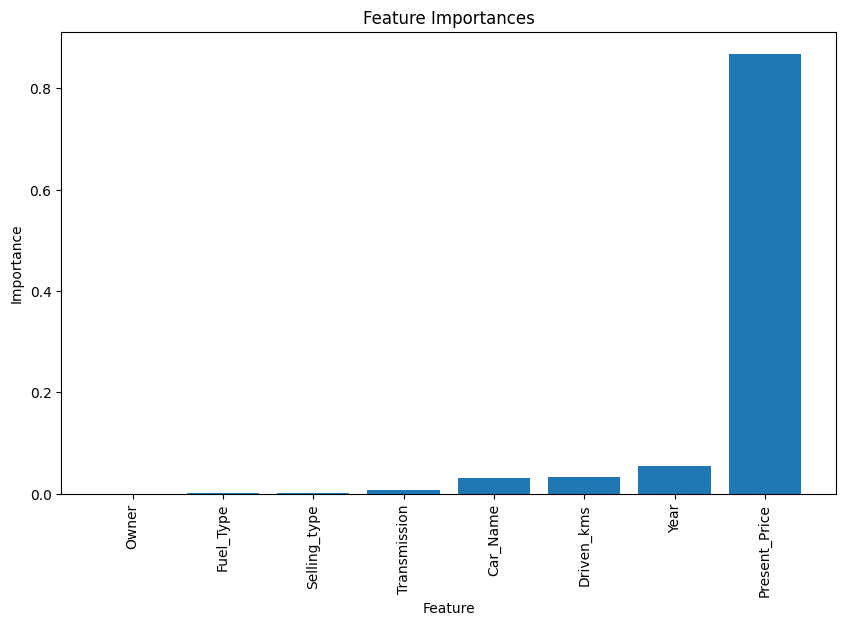

In [ ]:
importances = rf_regressor.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importances[sorted_indices], align='center')
plt.xticks(range(len(feature_names)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

**DecisionTreeRegressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42,max_depth=5)
dt_regressor.fit(x_train, y_train)
pred3 = dt_regressor.predict(x_test)

In [ ]:
mae = mean_absolute_error(y_test,pred3)
print("Mean Absolute Error (MAE):", mae)
mse = mean_squared_error(y_test,pred3)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test,pred3)
print("R-squared (R2) Score:", r2)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test,pred3)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 0.16923037377725592
Mean Squared Error (MSE): 0.06691064701858235
R-squared (R2) Score: 0.9252073761772295
Mean Absolute Percentage Error (MAPE): 118.34054604702098


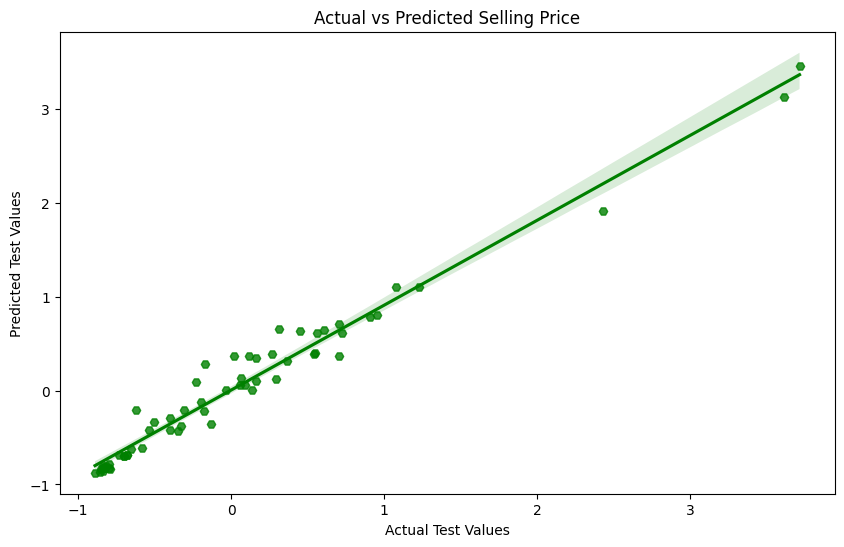

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=pred2, color="green",marker="H",label="best_fit_line")
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Test Values')
plt.show()

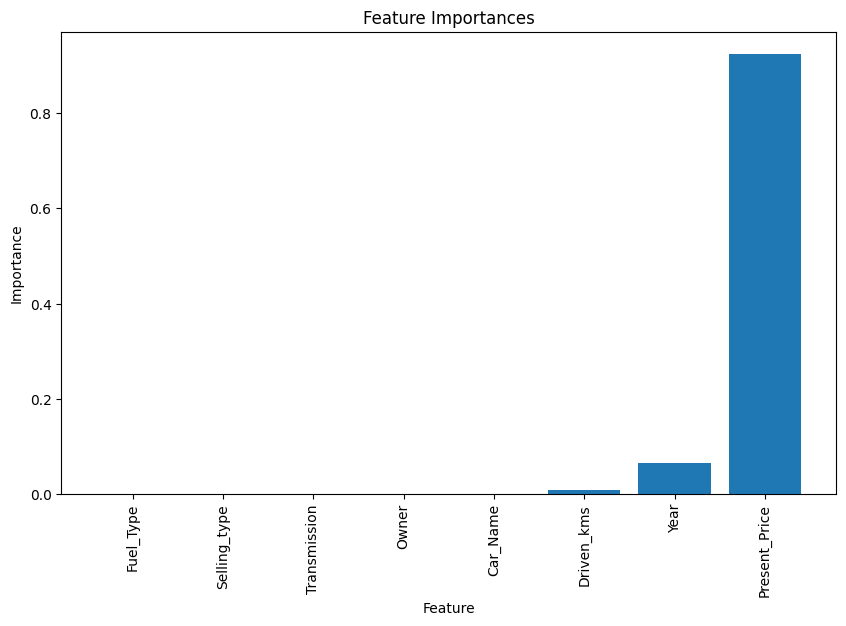

In [ ]:
importances = dt_regressor.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importances[sorted_indices], align='center')
plt.xticks(range(len(feature_names)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()